**A1.4A.5**: Does the system support deep learning methods and neural network algorithms including but not limited to Feed Forward Back Propagation Neural Network, Convoluted Neural Networks, Recursive Neural Networks

# Deep Learning Architecture

## Model Training

In [7]:
from IPython.display import display, HTML

def show_svg(url):
    svg_html = f'''
    <img src="{url}" 
    width="500" height="300"/>
    '''
    display(HTML(svg_html))



## 1. Feed Forward Neural Network

In [8]:
show_svg("https://www.researchgate.net/publication/349630467/figure/fig1/AS:995457505447936@1614346972386/Multilayer-perceptron-MLP-architecture-with-two-hidden-layers-and-one-prediction-output.png")

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Save the model
model.save('/project_data/data_asset/5a_ffnn_model.h5')

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2582 - accuracy: 0.9256
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1129 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9864
313/313 - 1s - loss: 0.0820 - accuracy: 0.9752 - 698ms/epoch - 2ms/step

Test accuracy: 0.9751999974250793


## 2. Convolution Neural Networks

In [9]:
show_svg("https://d14b9ctw0m6fid.cloudfront.net/ugblog/wp-content/uploads/2020/12/1-4.png")

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# The rest is the same as above

# Please reshape the data as follows before training:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Compile the model
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Save the model
model.save('/project_data/data_asset/5a_cnn_model.h5')


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1402 - accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0314 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0188 - accuracy: 0.9941
313/313 - 1s - loss: 0.0386 - accuracy: 0.9877 - 902ms/epoch - 3ms/step

Test accuracy: 0.9876999855041504


## 3. Recurrent Neural Network

In [10]:
show_svg("https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-rnn-ltr.png?9ea4417fc145b9346a3e288801dbdfdc")

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data
train_data = pad_sequences(train_data, maxlen=500)
test_data = pad_sequences(test_data, maxlen=500)

# Build the model
model = Sequential([
    Embedding(10000, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

# The rest is the same as above, just replace the data

# And save the model as:
model.save('/project_data/data_asset/5a_rnn_model.h5')


17464789/17464789 [==============================] - 2s 0us/step


## Model Prediction

## 1. Feed Forward Neural Network

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
import numpy as np
# Load the model
model = load_model('/project_data/data_asset/5a_ffnn_model.h5')

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Let's use the first image in the test set as an example
image = test_images[0]
image = np.expand_dims(image, axis=0)

# Make a prediction
predictions = model.predict(image)
print('Predicted:', np.argmax(predictions))
print('Actual:', test_labels[0])

1/1 [==============================] - 0s 117ms/step
Predicted: 7
Actual: 7


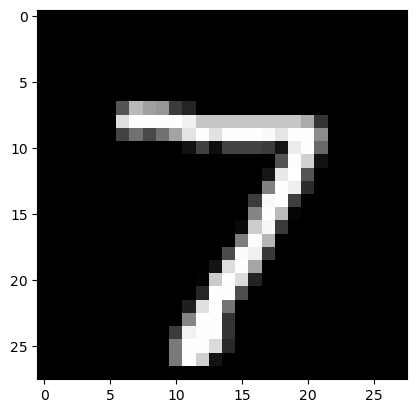

In [2]:
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(test_images[0], cmap='gray')
plt.show()

## 2. Convolution Neural Network

In [13]:
# Load the model
model = load_model('/project_data/data_asset/5a_cnn_model.h5')

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Please reshape the data as follows before training:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Let's use the first image in the test set as an example
image = test_images[0]
image = np.expand_dims(image, axis=0)

# Make a prediction
predictions = model.predict(image)
print('Predicted:', np.argmax(predictions))
print('Actual:', test_labels[0])


1/1 [==============================] - 0s 150ms/step
Predicted: 7
Actual: 7


## 3. Recurrent Neural Network

In [14]:
from tensorflow.keras.datasets import imdb
# Load the model
model = load_model('/project_data/data_asset/5a_rnn_model.h5')

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Let's use the first review in the test set as an example
review = test_data[0]
review = np.expand_dims(review, axis=0)

# Make a prediction
predictions = model.predict(review)
print('Predicted:', np.round(predictions[0][0]))

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print('Actual:', test_labels[0])


1/1 [==============================] - 0s 475ms/step
Predicted: 0.0
Actual: 0


### IMDB actual result for test[0]
The IMDB dataset from Keras is a set of 50,000 movie reviews from the Internet Movie Database (IMDB), split into 25,000 reviews for training and 25,000 reviews for testing. These reviews are labeled as either positive (1) or negative (0) - these are the sentiments expressed in the reviews.

In [6]:
import keras

# Load data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Get the word index from the imdb dataset
word_index = keras.datasets.imdb.get_word_index()

# Shift word index by 3 because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown"
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

# Build reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Use the reverse word index to get the original words from the encoding
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[0]])

print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? murder both in have <UNUSED> easily of of ? ? <UNK> <START> boring the <START> again marries understand dead <START> over a odd odd odd of of br how where first lead spiral make you cross in have movie not convict are role dark and where in true director and old just <UNK> not last i lot ? an he film spiral based both in <UNUSED> easily
